In [109]:
import numpy as np
import pandas as pd
git 
from datetime import datetime 
import matplotlib
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [61]:
error_file = "../data/error.log"

In [62]:
fp = open(error_file, "r")
str_log_record_list = fp.readlines()
str_log_record_list

['2018/07/17 16:50:07 [emerg] 4922#0: bind() to 0.0.0.0:80 failed (13: Permission denied)\n',
 '2018/07/17 16:51:48 [error] 5413#0: *3 kevent() reported that connect() failed (61: Connection refused) while connecting to upstream, client: 59.18.214.56, server: genolifecare.com, request: "GET /static/vendors/bootstrap/dist/css/bootstrap.min.css HTTP/1.1", upstream: "http://[::1]:13081/static/vendors/bootstrap/dist/css/bootstrap.min.css", host: "genolifecare.com", referrer: "https://genolifecare.com/"\n',
 '2018/07/17 16:52:26 [notice] 5931#0: signal process started\n',
 '2018/07/17 16:52:31 [notice] 5937#0: signal process started\n',
 '2018/07/17 16:52:36 [notice] 5947#0: signal process started\n',
 '2018/07/17 16:53:30 [notice] 5995#0: signal process started\n',
 '2018/07/17 16:53:43 [notice] 6109#0: signal process started\n',
 '2018/07/17 16:53:48 [notice] 6114#0: signal process started\n',
 '2018/07/17 16:53:53 [notice] 6122#0: signal process started\n',
 '2018/07/17 16:53:56 [notice]

In [153]:
class NginxAccessLog:
    def __init__(self, log_str):
        log_record = log_str.split()
        self.datetime = datetime.strptime(" ".join(log_record[:2]), "%Y/%m/%d %H:%M:%S")
        self.tag = log_record[2]
        self.message = " ".join(log_record[3:])
    
    def __str__(self):
        return " ".join([self.date.strftime("%Y/%m/%d %H:%M:%S"), self.tag, self.message])
    
    def to_dict(self):
        res = {
            "year": self.datetime.year,
            "month": self.datetime.month,
            "day": self.datetime.day,
            "hour": str(self.datetime.hour),
            "min": str(self.datetime.minute),
            "sec": str(self.datetime.second),
            "tag": self.tag,
            "message": self.message,
        }
        return res

In [154]:
log_list =[NginxAccessLog(str_log_record) for str_log_record in str_log_record_list]


In [178]:
log_df = pd.DataFrame([nginx_log.to_dict() for nginx_log in log_list])
log_df = log_df[['tag', 'year', 'month', 'day', 'hour', "min", "sec", 'message']]
log_df

,tag,year,month,day,hour,min,sec,message
0,[emerg],2018,7,17,16,50,7,4922#0: bind() to 0.0.0.0:80 failed (13: Permi...
1,[error],2018,7,17,16,51,48,5413#0: *3 kevent() reported that connect() fa...
2,[notice],2018,7,17,16,52,26,5931#0: signal process started
3,[notice],2018,7,17,16,52,31,5937#0: signal process started
4,[notice],2018,7,17,16,52,36,5947#0: signal process started
5,[notice],2018,7,17,16,53,30,5995#0: signal process started
6,[notice],2018,7,17,16,53,43,6109#0: signal process started
7,[notice],2018,7,17,16,53,48,6114#0: signal process started
8,[notice],2018,7,17,16,53,53,6122#0: signal process started
9,[notice],2018,7,17,16,53,56,6128#0: signal process started


In [179]:
def get_monthly_log(df, year, month):
    year_df = df[df["year"] == year] 
    monthly_df = year_df[df["month"] == month] 
    return monthly_df

In [180]:
monthly_df = get_monthly_log(log_df, 2018, 8)
monthly_df

,tag,year,month,day,hour,min,sec,message
1426,[error],2018,8,1,0,26,45,58840#0: *43153 kevent() reported that connect...
1427,[crit],2018,8,1,1,11,4,58840#0: *43179 SSL_do_handshake() failed (SSL...
1428,[error],2018,8,1,4,12,54,58840#0: *43190 kevent() reported that connect...
1429,[error],2018,8,1,4,13,10,58840#0: *43201 kevent() reported that connect...
1430,[error],2018,8,1,4,41,15,58840#0: *43210 kevent() reported that connect...
1431,[error],2018,8,1,7,21,46,"58840#0: *43227 open() ""/usr/local/Cellar/ngin..."
1432,[error],2018,8,1,7,51,28,58840#0: *43231 kevent() reported that connect...
1433,[error],2018,8,1,7,51,58,58840#0: *43231 kevent() reported that connect...
1434,[error],2018,8,1,7,52,42,58840#0: *43231 kevent() reported that connect...
1435,[error],2018,8,1,7,52,55,58840#0: *43241 kevent() reported that connect...


In [181]:
date_list = list(set(monthly_df["day"]))

In [182]:
date_cnt_dict = {"cnt": {}}
for day in date_list:
    log_df_date_series = monthly_df["day"] 
    date_str = "2018-08-{:02d}".format(day)
    date_cnt_dict["cnt"][date_str] = log_df_date_series[log_df_date_series==day].count()
date_cnt_df = pd.DataFrame(date_cnt_dict)
date_cnt_df

,cnt
2018-08-01,381
2018-08-02,69
2018-08-03,56
2018-08-04,19
2018-08-05,19
2018-08-06,194
2018-08-07,541
2018-08-08,144
2018-08-09,173
2018-08-10,463


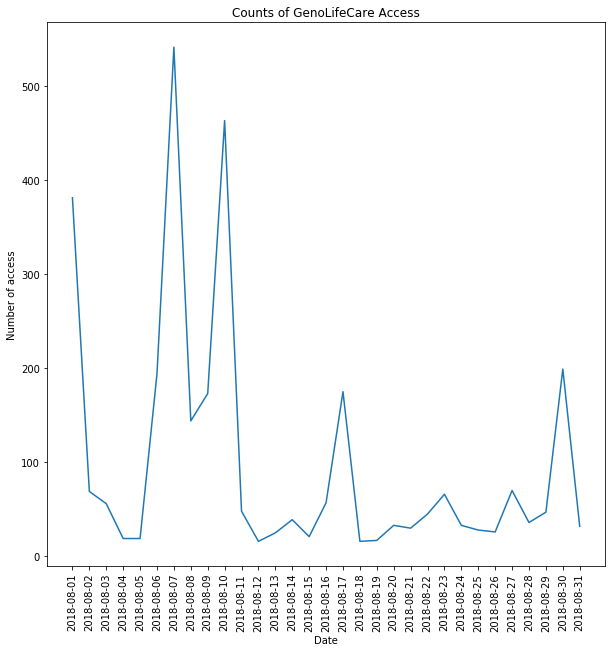

In [184]:
y = list(date_cnt_df['cnt'])
x = range(len(y))

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y)
ax.set_title("Counts of GenoLifeCare Access")
ax.set_ylabel("Number of access")
ax.set_xlabel("Date")

ax.set_xticks(x)
ax.set_xticklabels(list(date_cnt_df.index), rotation='vertical')

fig.show()

In [176]:
log_list[0].datetime.day

17

In [167]:
x

range(0, 15)

In [174]:
date_cnt_df.index

Index(['2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
       '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
       '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31'],
      dtype='object')